In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import torch
import torchvision
import numpy as np
import pandas as pd
import PIL
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [5]:
augmented_images_paths = Path("/content/drive/MyDrive/Medical_Dataset")
augmented_train_dir = Path("/content/drive/MyDrive/Medical_Dataset/train_augmented") #using Path funtion to get paths from drive in PosixPath format
test_dir = Path("/content/drive/MyDrive/Medical_Dataset/test")

augmented_images_paths, augmented_train_dir, test_dir

(PosixPath('/content/drive/MyDrive/Medical_Dataset'),
 PosixPath('/content/drive/MyDrive/Medical_Dataset/train_augmented'),
 PosixPath('/content/drive/MyDrive/Medical_Dataset/test'))

Resizing and Converting the images to Tensors

In [10]:
from torchvision import datasets, transforms
import random
from PIL import Image

image_path_list = list(augmented_images_paths.glob("*/*/*.jpg"))

In [34]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

In [48]:
data_transform = transforms.Compose([
    transforms.Resize(size=(256,256)),
    transforms.Lambda(lambda img: img.convert('RGB')), # 4 channels to 3 channels
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    normalize #done to make sure, this dataset has the same image distribution as ImageNet
])

path of the image is: /content/drive/MyDrive/Medical_Dataset/train_augmented/Warts/img (649).jpg
class of the image is: Warts


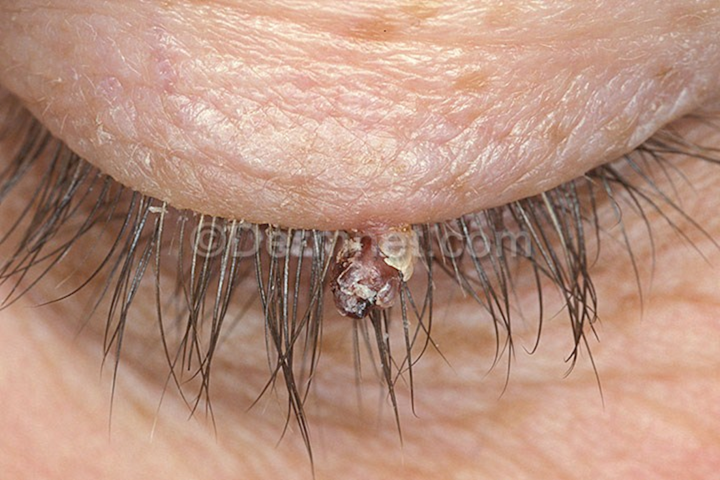

In [49]:
#picking a random image from the list and then printing it out
random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"path of the image is: {random_image_path}")
print(f"class of the image is: {image_class}")
img

In [50]:
print(f"image tensor: {data_transform(img)}")
print(f"image shape/size: {data_transform(img).shape}")

image tensor: tensor([[[ 0.3994,  0.4337,  0.5022,  ...,  1.0844,  1.0502,  1.0673],
         [ 0.4166,  0.5022,  0.5022,  ...,  1.0844,  1.0844,  1.0844],
         [ 0.4679,  0.4851,  0.5193,  ...,  1.0844,  1.1187,  1.1187],
         ...,
         [ 1.6667,  1.7009,  1.7523,  ...,  1.7865,  1.8208,  1.7865],
         [ 1.6667,  1.6667,  1.7180,  ...,  1.8037,  1.8037,  1.7694],
         [ 1.6667,  1.6667,  1.6667,  ...,  1.8037,  1.8037,  1.7694]],

        [[-0.1450, -0.0749, -0.0224,  ...,  0.5903,  0.5728,  0.5903],
         [-0.1099, -0.0224, -0.0224,  ...,  0.5378,  0.5728,  0.6078],
         [-0.1099, -0.0749, -0.0399,  ...,  0.5203,  0.5728,  0.6078],
         ...,
         [ 1.0630,  1.0455,  1.0280,  ...,  0.9930,  1.0455,  1.0280],
         [ 1.0280,  1.0105,  1.0105,  ...,  1.0455,  1.0805,  1.0805],
         [ 0.9580,  1.0105,  0.9930,  ...,  1.0280,  1.0455,  1.0455]],

        [[-0.2707, -0.2010, -0.1138,  ...,  0.4439,  0.3393,  0.3393],
         [-0.2532, -0.1487, -0.

Creating Updated datasets with augmented image folder

In [51]:
train_data = datasets.ImageFolder(root=augmented_train_dir,
                      transform=data_transform,
                      target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                     transform=data_transform)

In [52]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 12000
     Root location: /content/drive/MyDrive/Medical_Dataset/train_augmented
     StandardTransform
 Transform: Compose(
                Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
                Lambda()
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 787
     Root location: /content/drive/MyDrive/Medical_Dataset/test
     StandardTransform
 Transform: Compose(
                Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
                Lambda()
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

FROM HERE NOW IT IS CLEAR THAT THE DATASET IS NOW HAVING 12000 AUGMENTED IMAGES IN TOTAL, 1500 IMAGES FOR 8 CLASSES EACH

In [53]:
class_names = train_data.classes
classes_to_idx = train_data.class_to_idx

In [54]:
class_names, classes_to_idx

(['Acne (Normal to Mild)',
  'Conjunctivitis',
  'Folliculitis',
  'Hives Urticaria',
  'Nail Fungus and Cracked Nails',
  'Ringworms (Skin Fungal Infection)',
  'Stye (Inflammation around eyes)',
  'Warts'],
 {'Acne (Normal to Mild)': 0,
  'Conjunctivitis': 1,
  'Folliculitis': 2,
  'Hives Urticaria': 3,
  'Nail Fungus and Cracked Nails': 4,
  'Ringworms (Skin Fungal Infection)': 5,
  'Stye (Inflammation around eyes)': 6,
  'Warts': 7})

Preparing the train and test DataLoader

In [55]:
from torch.utils.data import DataLoader

In [56]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=32,
                              num_workers=1,
                              shuffle=False)

In [57]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bf2a23438b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7bf2a2343490>)

In [58]:
len(train_dataloader), len(test_dataloader), len(train_data), len(test_data)

(375, 25, 12000, 787)

In [59]:
img, label = next(iter(train_dataloader))
print(f"image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"label shape: {label.shape}")

image shape: torch.Size([32, 3, 256, 256]) -> [batch_size, color_channels, height, width]
label shape: torch.Size([32])


Training Function

In [62]:
from tqdm.auto import tqdm
from torch import nn

In [65]:
def train_step(model: torch.nn.Module,
          dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fun: torch.nn.Module,
          device=device):

  model.train()

  train_loss, test_loss = 0, 0

  for batch, (X,y) in enumerate(dataloader):

    y_pred = model(X) #this is raw logits

    loss = loss_fun(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    #conversion of logits to prediction probabilities to prediction class/labels
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += ((y_pred_class==y).sum().item())/len(y_pred)

  # Adjust metrics to get average loss and average accuracy
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


Testing Function

In [66]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fun: torch.nn.Module,
              device=device):

  #put the model to evaluation mode
  model.eval()

  #setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  #turn on the inference mode
  with torch.inference_mode():
    #loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):

      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. forward pass
      test_pred_logits = model(X)

      #2 calculate the loss
      loss = loss_fun(test_pred_logits, y)
      test_loss += loss.item()

      #calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(axis=1)
      test_acc += ((test_pred_labels == y).sum().item()) / len(test_pred_labels)

  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

Training Loop

In [67]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fun: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int=30,
          device=device):

  #to track our results, i like to create an empty dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  #looping through training and testing loop for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fun=loss_fun,
                                       optimizer=optimizer)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fun=loss_fun)

    #printing whatever is happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train accuracy: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

    #updating the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  #returning the filled results at the end of each epoch (to be written outside the for loop)
  return results